# 앙상블 기법
- 무작위로 선택된 수천명의 사람들에게 복잡하거나 어려운 질문을 하고 대답을 모은다고 가정
- 이렇게 모아진 답은 한명의 전문가의 답보다 나을 수 있음 => 집단지성, 대중의 지혜

- 이처럼 일련의 분석기/예측기로 부터 예측을 수집하면 가장 좋은 하나의 모델보다 더 좋은 예측을 얻을 수 있음

    - 일련의 분석기/예측기 => 앙상블
    - 앙상블을 통해 학습 => 앙상블 학습
    - 앙상블 학습 알고리즘 => 보팅, 베깅, 부스팅, 스태킹

- 머신러닝 경진대회(kaggle, 공모전)에서 우승하고 싶다면? => 여러 앙상블 방법을 이용!

# 투표기반 분류기votting
- 정확도가 좋은 분류기 여러개를 이용해서 학습시킴 => 로지스틱/SVM/랜덤포레스트/K최근접이웃 등등
- 각 분류기로 부터 예측을 모아 가장 많이 선택된 클래스를 예측함 => 큰수의 법칙
    - 하드보팅   : 다수결 투표로 결정함, 직접투표분류기
    - 소프트보팅 : 확률의 총합으로 결정, 간접투표분류기

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score

from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.svm import SVC
from sklearn.decomposition import PCA

In [4]:
from sklearn.ensemble import VotingClassifier

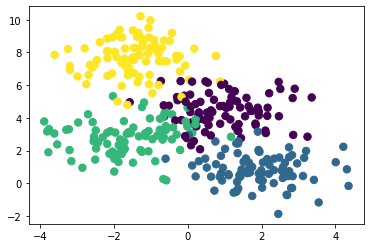

In [5]:
# 테스트용 데이터 생성
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=350, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:,0], X[:,1], c=y, s=55)
plt.show()

# 데이터 분할
x_train, x_test, y_train, y_test = \
    train_test_split(X, y,
                     random_state=2209021005)

# 투표 분류기 생성 1
- 직접투표hard votting : 모든 분류기가 클래스를 예측해서 개별 분류기의 최빈값을 계산하고 빈도값이 가장 높은 클래스를 예측

In [6]:
lrclf = LogisticRegression()
rfclf = RandomForestClassifier()
svclf = SVC()

# votiing: 투표방식 지정(soft/hard)
# estimators : 투표분류기에 사용할 분류기 지정
voteclf = VotingClassifier(voting='hard', 
        estimators=[('lr', lrclf), ('rf', rfclf), ('svm', svclf)])

In [7]:
# 훈련 및 평가
voteclf.fit(x_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svm', SVC())])

In [8]:
voteclf.score(x_train, y_train)

0.9351145038167938

In [15]:
for clf in (lrclf, rfclf, svclf, voteclf):
    clf.fit(x_train, y_train)
    print(clf.__class__.__name__, clf.score(x_train, y_train))

LogisticRegression 0.9274809160305344
RandomForestClassifier 1.0
SVC 0.9236641221374046
VotingClassifier 0.9351145038167938


In [19]:
for clf in (lrclf, rfclf, svclf, voteclf):
    pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, pred))

LogisticRegression 0.8863636363636364
RandomForestClassifier 0.8636363636363636
SVC 0.8863636363636364
VotingClassifier 0.8863636363636364


In [22]:
pip install mlxtend

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 44.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


/opt/miniconda3/lib/python3.8/site-packages/mlxtend/plotting/decision_regions.py:300: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


<AxesSubplot:>

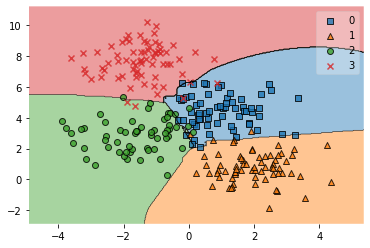

In [23]:
# 결정영역 시각화
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(x_train, y_train, voteclf)

# 투표 분류기 생성 2
- 간접투표soft votting : 모든 분류기가 클래스의 확률을 예측해서 개별 분류기의 평균을 내어 확률이 가장 높은 클래스를 예측

In [9]:
lrclf = LogisticRegression()
rfclf = RandomForestClassifier()
svclf = SVC(probability=True) # 확률 예측 지정

# votiing: 투표방식 지정(soft/hard)
# estimators : 투표분류기에 사용할 분류기 지정
voteclf = VotingClassifier(voting='soft', 
        estimators=[('lr', lrclf), ('rf', rfclf), ('svm', svclf)])

In [10]:
for clf in (lrclf, rfclf, svclf, voteclf):
    clf.fit(x_train, y_train)
    print(clf.__class__.__name__, clf.score(x_train, y_train))

LogisticRegression 0.9274809160305344
RandomForestClassifier 1.0
SVC 0.9236641221374046
VotingClassifier 0.9618320610687023


In [11]:
for clf in (lrclf, rfclf, svclf, voteclf):
    pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, pred))

LogisticRegression 0.8863636363636364
RandomForestClassifier 0.875
SVC 0.8863636363636364
VotingClassifier 0.875


/opt/miniconda3/lib/python3.8/site-packages/mlxtend/plotting/decision_regions.py:300: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


<AxesSubplot:>

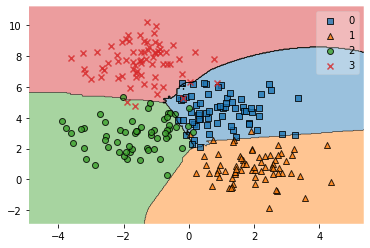

In [27]:
# 결정영역 시각화
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(x_train, y_train, voteclf)

# 연습문제 - iris